# Лабораторная работа по распознаванию цифр с использованием набора данных MNIST

Введение: В данной лабораторной работе студентам предлагается рассмотреть задачу распознавания рукописных цифр на основе набора данных MNIST. Мы будем использовать инструменты MATLAB для обучения и оценки модели машинного обучения.
Теоретическое обоснование: Задача распознавания рукописных цифр является классической задачей классификации изображений в области машинного обучения. В рамках данной лабораторной работы мы будем использовать простую полносвязную нейронную сеть (Multilayer Perceptron, MLP) для решения этой задачи.


![title](mlp.png)

Описание данных: Набор данных MNIST состоит из 70 000 изображений размером 28x28 пикселей, каждое из которых представляет собой рукописную цифру от 0 до 9. Изображения представлены в градациях серого, где 0 - белый цвет, а 255 - черный. Данные разделены на две части: обучающую выборку из 60 000 изображений и тестовую выборку из 10 000 изображений.
Описание метрик: В качестве метрик для оценки модели мы будем использовать точность (accuracy) и матрицу ошибок (confusion matrix). Точность представляет собой долю правильно классифицированных изображений, а матрица ошибок показывает, какие классы были правильно и неправильно распознаны.
Описание модели: Мы будем использовать полносвязную нейронную сеть с одним скрытым слоем. В качестве функции активации на скрытом слое используется ReLU, а на выходном слое - softmax. В качестве алгоритма оптимизации будет использоваться стохастический градиентный спуск (SGD).


## Импорт необходимых библиотек

In [3]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import ToTensor
from sklearn.metrics import confusion_matrix, accuracy_score

## Загрузка данных

In [4]:
train_data = torchvision.datasets.MNIST(root='./data', train=True, transform=ToTensor(), download=True)
test_data = torchvision.datasets.MNIST(root='./data', train=False, transform=ToTensor(), download=True)

## Разделение данных на обучающую тестовую и валидационную выборки

In [5]:
train_data, val_data = random_split(train_data, [50000, 10000])
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

## Описание модели

In [6]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=1)
        return x

## Инициализация модели и определение функций обучения и оценки

In [7]:
model = MLP()
optimizer = optim.SGD(model.parameters(), lr=0.01)

def train_epoch(model, data_loader, optimizer, loss_fn):
    model.train()
    for X, Y in data_loader:
        optimizer.zero_grad()
        Y_pred = model(X)
        loss = loss_fn(Y_pred, Y)
        loss.backward()
        optimizer.step()
        
def evaluate_model(model, data_loader, loss_fn):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for X, Y in data_loader:
            Y_pred = model(X)
            loss = loss_fn(Y_pred, Y)
            total_loss += loss.item()
    return total_loss / len(data_loader)        

## Обучение

In [8]:
num_epochs = 20
loss_fn = nn.CrossEntropyLoss()

for epoch in range(num_epochs):
    train_epoch(model, train_loader, optimizer, loss_fn)
    val_loss = evaluate_model(model, val_loader, loss_fn)
    print(f"Epoch {epoch+1}, Validation Loss: {val_loss:.4f}")

Epoch 1, Validation Loss: 2.2809
Epoch 2, Validation Loss: 2.1983
Epoch 3, Validation Loss: 2.0234
Epoch 4, Validation Loss: 1.8871
Epoch 5, Validation Loss: 1.8235
Epoch 6, Validation Loss: 1.7884
Epoch 7, Validation Loss: 1.7675
Epoch 8, Validation Loss: 1.7537
Epoch 9, Validation Loss: 1.7277
Epoch 10, Validation Loss: 1.6968
Epoch 11, Validation Loss: 1.6827
Epoch 12, Validation Loss: 1.6616
Epoch 13, Validation Loss: 1.6409
Epoch 14, Validation Loss: 1.6274
Epoch 15, Validation Loss: 1.6177
Epoch 16, Validation Loss: 1.6102
Epoch 17, Validation Loss: 1.6044
Epoch 18, Validation Loss: 1.5998
Epoch 19, Validation Loss: 1.5959
Epoch 20, Validation Loss: 1.5929


## Оценка полученной модели

In [9]:
def predict(model, loader):
    model.eval()
    all_preds = []
    with torch.no_grad():
        for X, _ in loader:
            preds = model(X)
            _, pred_labels = torch.max(preds, 1)
            all_preds.extend(pred_labels.numpy())
    return all_preds

Y_pred = predict(model, test_data)
accuracy = accuracy_score(test_data.targets.numpy(), Y_pred)
cm = confusion_matrix(test_data.targets.numpy(), Y_pred)
print(f"Точность: {accuracy:.4f}")
print("Матрица ошибок:")
print(cm)

Точность: 0.9027
Матрица ошибок:
[[ 963    0    4    2    0    3    5    1    2    0]
 [   0 1107    2    6    0    0    5    2   13    0]
 [  15    3  902   14   16    1   19   21   34    7]
 [   3    0   23  913    1   23    3   16   20    8]
 [   2    3    5    1  904    0   17    2    7   41]
 [  27    6   10   57   26  663   27   16   52    8]
 [  21    3    4    0   10   14  902    0    4    0]
 [   6   17   34    2   11    1    0  926    8   23]
 [   9    8    9   17   12   20   16   14  856   13]
 [  12    7    3   10   40   14    1   20   11  891]]


## Визуализация

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(images, labels, preds, num_samples=10):
    idxs = np.random.choice(len(images), size=num_samples, replace=False)
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i, ax in zip(idxs, axes):
        ax.imshow(images[i].numpy().squeeze(), cmap='gray')
        ax.set_title(f"{preds[i]} (true: {labels[i]})")
        ax.axis('off')
    plt.show()

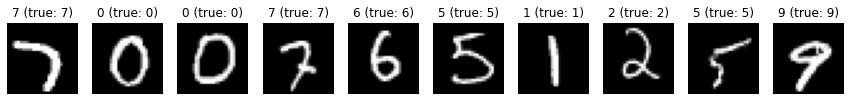

In [11]:
test_images, test_labels = next(iter(test_loader))
model.eval()
all_preds = []
with torch.no_grad():
        for X in test_images:
            preds = model(X)
            _, pred_labels = torch.max(preds, 1)
            all_preds.extend(pred_labels.numpy())
visualize_predictions(test_images, test_labels.numpy(), all_preds)